<a href="https://colab.research.google.com/github/Jun-Liu-291/cats-and-dogs-CNN/blob/master/cat%26dog_v9_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/



Load a pretrained 4-layers-CNN model on cats & dogs small data set with 87% accuracy on validation set an 85% accuracy on test set.

since a stack of CNN layers with kernel size with 3 is equal to a single CNN layer with bigger kernel size.(imitate VGG model)

In [ ]:
from keras.models import load_model

model_base = load_model('/content/drive/My Drive/dataset/cats&dogs/small_dataset/cats_and_dogs_small_f3.h5')

Using TensorFlow backend.


In [ ]:
model_base.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 128)      

In [ ]:
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers

conv_base = model_base.get_layer("max_pooling2d_4").output

conv_2d = layers.Conv2D(512, (3, 3), activation='relu', padding = 'same', name = 'conv2d_10')(conv_base)
conv_2d = layers.Conv2D(512, (3, 3), activation='relu', padding = 'same', name = 'conv2d_11')(conv_2d)
conv_2d = layers.Conv2D(512, (3, 3), activation='relu', padding = 'same', name = 'conv2d_12')(conv_2d)
MPooling = layers.MaxPooling2D((2, 2), name = 'max_pooling2d_6')(conv_2d)
flatten = layers.Flatten()(MPooling)
dropout = layers.Dropout(0.4, name = 'dropout_4')(flatten)
dense = layers.Dense(1024, activation = 'relu')(dropout)
dense = layers.Dense(1024, activation = 'relu')(dense)
pred = layers.Dense(1, activation = 'sigmoid')(dense)

model = models.Model(inputs=model_base.input, outputs=pred)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0   

In [ ]:
from keras import optimizers

import tensorflow as tf


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os

batch_size = 256
epoch_lenth = 100
image_size = (150, 150)
train_step_per_epochs = int(20000 / batch_size)
validation_step_per_epochs = int(2500 / batch_size)

train_dir = '/content/drive/My Drive/dataset/cat & dog/train'
validation_dir = '/content/drive/My Drive/dataset/cat & dog/validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=35,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 2502 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
# change callback function
# apply ReduceLRonPlateau for changing LR
reduceLR = ReduceLROnPlateau(
    monitor="loss",
    factor = 0.8,
    patience = 5,
    verbose = 1,
    mode = 'min',
    min_lr = 1e-6)

# save whole model when get a better val accuracy
checkpoint = ModelCheckpoint(
    filepath = '/content/drive/My Drive/dataset/cat & dog/cat&dog_model.{epoch:02d}-{val_loss:.2f}.h5',
    monitor='val_acc',
    save_weights_only = False,
    save_best_only = True
)

my_callbacks = [reduceLR, checkpoint]

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_step_per_epochs,
    epochs=epoch_lenth,
    validation_data=validation_generator,
    validation_steps=validation_step_per_epochs,
    callbacks = my_callbacks
)

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 33 could not be retrieved. It could be because a worker has died.
  UserWarning)


 1/78 [..............................] - ETA: 2:51:56 - loss: 0.6931 - acc: 0.4727

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 51 could not be retrieved. It could be because a worker has died.
  UserWarning)


 2/78 [..............................] - ETA: 2:32:12 - loss: 0.6781 - acc: 0.5078

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 46 could not be retrieved. It could be because a worker has died.
  UserWarning)


 3/78 [>.............................] - ETA: 2:24:29 - loss: 0.6796 - acc: 0.5326

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 7 could not be retrieved. It could be because a worker has died.
  UserWarning)


 4/78 [>.............................] - ETA: 2:20:31 - loss: 0.6909 - acc: 0.5312

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 14 could not be retrieved. It could be because a worker has died.
  UserWarning)


 5/78 [>.............................] - ETA: 2:19:13 - loss: 0.6900 - acc: 0.5445

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


 6/78 [=>............................] - ETA: 2:16:04 - loss: 0.6871 - acc: 0.5527

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 54 could not be retrieved. It could be because a worker has died.
  UserWarning)


 7/78 [=>............................] - ETA: 2:13:36 - loss: 0.6831 - acc: 0.5592

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 27 could not be retrieved. It could be because a worker has died.
  UserWarning)


 8/78 [==>...........................] - ETA: 2:11:02 - loss: 0.6835 - acc: 0.5518

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 61 could not be retrieved. It could be because a worker has died.
  UserWarning)


 9/78 [==>...........................] - ETA: 2:08:31 - loss: 0.6809 - acc: 0.5525

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 25 could not be retrieved. It could be because a worker has died.
  UserWarning)


10/78 [==>...........................] - ETA: 2:06:37 - loss: 0.6784 - acc: 0.5699

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 63 could not be retrieved. It could be because a worker has died.
  UserWarning)


11/78 [===>..........................] - ETA: 2:04:45 - loss: 0.6740 - acc: 0.5778

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 67 could not be retrieved. It could be because a worker has died.
  UserWarning)


12/78 [===>..........................] - ETA: 2:02:37 - loss: 0.6667 - acc: 0.5941

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


13/78 [====>.........................] - ETA: 2:01:21 - loss: 0.6763 - acc: 0.5962

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 76 could not be retrieved. It could be because a worker has died.
  UserWarning)


14/78 [====>.........................] - ETA: 1:59:23 - loss: 0.6775 - acc: 0.5865

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 29 could not be retrieved. It could be because a worker has died.
  UserWarning)


15/78 [====>.........................] - ETA: 1:57:12 - loss: 0.6763 - acc: 0.5839

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 22 could not be retrieved. It could be because a worker has died.
  UserWarning)


16/78 [=====>........................] - ETA: 1:55:16 - loss: 0.6737 - acc: 0.5808

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 36 could not be retrieved. It could be because a worker has died.
  UserWarning)


17/78 [=====>........................] - ETA: 1:53:17 - loss: 0.6711 - acc: 0.5793

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 12 could not be retrieved. It could be because a worker has died.
  UserWarning)


18/78 [=====>........................] - ETA: 1:51:25 - loss: 0.6671 - acc: 0.5822

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 48 could not be retrieved. It could be because a worker has died.
  UserWarning)


19/78 [======>.......................] - ETA: 1:49:21 - loss: 0.6650 - acc: 0.5847

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 28 could not be retrieved. It could be because a worker has died.
  UserWarning)


20/78 [======>.......................] - ETA: 1:47:33 - loss: 0.6630 - acc: 0.5891

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 26 could not be retrieved. It could be because a worker has died.
  UserWarning)


21/78 [=======>......................] - ETA: 1:45:34 - loss: 0.6582 - acc: 0.5990

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)


22/78 [=======>......................] - ETA: 1:44:01 - loss: 0.6499 - acc: 0.6080

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 38 could not be retrieved. It could be because a worker has died.
  UserWarning)


23/78 [=======>......................] - ETA: 1:42:13 - loss: 0.6454 - acc: 0.6136

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


24/78 [========>.....................] - ETA: 1:40:16 - loss: 0.7222 - acc: 0.6090

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 68 could not be retrieved. It could be because a worker has died.
  UserWarning)


25/78 [========>.....................] - ETA: 1:38:37 - loss: 0.7178 - acc: 0.6141

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 43 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/78 [=========>....................] - ETA: 1:36:49 - loss: 0.7126 - acc: 0.6185

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


27/78 [=========>....................] - ETA: 1:34:49 - loss: 0.7076 - acc: 0.6231

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 60 could not be retrieved. It could be because a worker has died.
  UserWarning)


28/78 [=========>....................] - ETA: 1:32:57 - loss: 0.7026 - acc: 0.6268

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 70 could not be retrieved. It could be because a worker has died.
  UserWarning)


29/78 [==========>...................] - ETA: 1:30:58 - loss: 0.6956 - acc: 0.6323

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


30/78 [==========>...................] - ETA: 1:29:03 - loss: 0.6895 - acc: 0.6353

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


31/78 [==========>...................] - ETA: 1:27:06 - loss: 0.6837 - acc: 0.6392

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 50 could not be retrieved. It could be because a worker has died.
  UserWarning)


32/78 [===========>..................] - ETA: 1:25:11 - loss: 0.6763 - acc: 0.6443

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


33/78 [===========>..................] - ETA: 1:23:17 - loss: 0.6756 - acc: 0.6457

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 64 could not be retrieved. It could be because a worker has died.
  UserWarning)


34/78 [============>.................] - ETA: 1:21:22 - loss: 0.6725 - acc: 0.6453

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 77 could not be retrieved. It could be because a worker has died.
  UserWarning)


35/78 [============>.................] - ETA: 1:19:32 - loss: 0.6704 - acc: 0.6440

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 52 could not be retrieved. It could be because a worker has died.
  UserWarning)


36/78 [============>.................] - ETA: 1:17:41 - loss: 0.6679 - acc: 0.6459

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 62 could not be retrieved. It could be because a worker has died.
  UserWarning)


37/78 [=============>................] - ETA: 1:15:49 - loss: 0.6647 - acc: 0.6479

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 44 could not be retrieved. It could be because a worker has died.
  UserWarning)


38/78 [=============>................] - ETA: 1:13:57 - loss: 0.6618 - acc: 0.6505

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 53 could not be retrieved. It could be because a worker has died.
  UserWarning)


39/78 [==============>...............] - ETA: 1:12:09 - loss: 0.6581 - acc: 0.6534

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 31 could not be retrieved. It could be because a worker has died.
  UserWarning)


40/78 [==============>...............] - ETA: 1:10:16 - loss: 0.6528 - acc: 0.6571

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 66 could not be retrieved. It could be because a worker has died.
  UserWarning)


41/78 [==============>...............] - ETA: 1:08:21 - loss: 0.6465 - acc: 0.6617

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


42/78 [===============>..............] - ETA: 1:06:27 - loss: 0.6409 - acc: 0.6648

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 59 could not be retrieved. It could be because a worker has died.
  UserWarning)


43/78 [===============>..............] - ETA: 1:04:35 - loss: 0.6359 - acc: 0.6682

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 41 could not be retrieved. It could be because a worker has died.
  UserWarning)


45/78 [================>.............] - ETA: 59:47 - loss: 0.6266 - acc: 0.6710  

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 75 could not be retrieved. It could be because a worker has died.
  UserWarning)


46/78 [================>.............] - ETA: 58:03 - loss: 0.6212 - acc: 0.6745

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 65 could not be retrieved. It could be because a worker has died.
  UserWarning)


47/78 [=================>............] - ETA: 56:18 - loss: 0.6176 - acc: 0.6769

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 30 could not be retrieved. It could be because a worker has died.
  UserWarning)


48/78 [=================>............] - ETA: 54:31 - loss: 0.6139 - acc: 0.6796

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 37 could not be retrieved. It could be because a worker has died.
  UserWarning)


49/78 [=================>............] - ETA: 52:43 - loss: 0.6102 - acc: 0.6825

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 34 could not be retrieved. It could be because a worker has died.
  UserWarning)


50/78 [==================>...........] - ETA: 50:55 - loss: 0.6067 - acc: 0.6847

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 58 could not be retrieved. It could be because a worker has died.
  UserWarning)


51/78 [==================>...........] - ETA: 49:06 - loss: 0.6021 - acc: 0.6875

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


52/78 [===================>..........] - ETA: 47:19 - loss: 0.5994 - acc: 0.6894

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


53/78 [===================>..........] - ETA: 45:32 - loss: 0.5964 - acc: 0.6915

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


54/78 [===================>..........] - ETA: 43:45 - loss: 0.5943 - acc: 0.6930

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)


55/78 [====================>.........] - ETA: 41:57 - loss: 0.5924 - acc: 0.6943

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 56 could not be retrieved. It could be because a worker has died.
  UserWarning)


56/78 [====================>.........] - ETA: 40:08 - loss: 0.5912 - acc: 0.6948

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 24 could not be retrieved. It could be because a worker has died.
  UserWarning)


57/78 [====================>.........] - ETA: 38:18 - loss: 0.5885 - acc: 0.6971

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 57 could not be retrieved. It could be because a worker has died.
  UserWarning)


58/78 [=====================>........] - ETA: 36:31 - loss: 0.5857 - acc: 0.6989

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 32 could not be retrieved. It could be because a worker has died.
  UserWarning)


59/78 [=====================>........] - ETA: 34:46 - loss: 0.5841 - acc: 0.6994

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 35 could not be retrieved. It could be because a worker has died.
  UserWarning)


60/78 [======================>.......] - ETA: 32:57 - loss: 0.5822 - acc: 0.7003

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 23 could not be retrieved. It could be because a worker has died.
  UserWarning)


61/78 [======================>.......] - ETA: 31:07 - loss: 0.5795 - acc: 0.7026

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)


62/78 [======================>.......] - ETA: 29:19 - loss: 0.5768 - acc: 0.7042

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 74 could not be retrieved. It could be because a worker has died.
  UserWarning)


63/78 [=======================>......] - ETA: 27:33 - loss: 0.5750 - acc: 0.7055

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


64/78 [=======================>......] - ETA: 25:44 - loss: 0.5722 - acc: 0.7075

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


65/78 [========================>.....] - ETA: 23:55 - loss: 0.5702 - acc: 0.7088

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 40 could not be retrieved. It could be because a worker has died.
  UserWarning)


66/78 [========================>.....] - ETA: 22:06 - loss: 0.5676 - acc: 0.7105

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 45 could not be retrieved. It could be because a worker has died.
  UserWarning)


67/78 [========================>.....] - ETA: 20:16 - loss: 0.5660 - acc: 0.7117

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 19 could not be retrieved. It could be because a worker has died.
  UserWarning)


68/78 [=========================>....] - ETA: 18:27 - loss: 0.5678 - acc: 0.7108

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 69 could not be retrieved. It could be because a worker has died.
  UserWarning)


69/78 [=========================>....] - ETA: 16:37 - loss: 0.5672 - acc: 0.7119

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 42 could not be retrieved. It could be because a worker has died.
  UserWarning)


70/78 [=========================>....] - ETA: 14:48 - loss: 0.5662 - acc: 0.7123

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 18 could not be retrieved. It could be because a worker has died.
  UserWarning)


71/78 [==========================>...] - ETA: 12:57 - loss: 0.5651 - acc: 0.7125

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 49 could not be retrieved. It could be because a worker has died.
  UserWarning)


72/78 [==========================>...] - ETA: 11:07 - loss: 0.5637 - acc: 0.7131

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 47 could not be retrieved. It could be because a worker has died.
  UserWarning)


73/78 [===========================>..] - ETA: 9:16 - loss: 0.5616 - acc: 0.7148 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 39 could not be retrieved. It could be because a worker has died.
  UserWarning)


74/78 [===========================>..] - ETA: 7:26 - loss: 0.5591 - acc: 0.7162

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 55 could not be retrieved. It could be because a worker has died.
  UserWarning)


75/78 [===========================>..] - ETA: 5:34 - loss: 0.5568 - acc: 0.7177

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 71 could not be retrieved. It could be because a worker has died.
  UserWarning)


76/78 [============================>.] - ETA: 3:43 - loss: 0.5561 - acc: 0.7184

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


77/78 [============================>.] - ETA: 1:51 - loss: 0.5551 - acc: 0.7192

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 73 could not be retrieved. It could be because a worker has died.
  UserWarning)


78/78 [==============================] - 8738s 112s/step - loss: 0.5540 - acc: 0.7197 - val_loss: 0.4057 - val_acc: 0.8234
Epoch 2/100


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 72 could not be retrieved. It could be because a worker has died.
  UserWarning)


78/78 [==============================] - 301s 4s/step - loss: 0.4201 - acc: 0.8043 - val_loss: 0.3014 - val_acc: 0.8553
Epoch 3/100
78/78 [==============================] - 183s 2s/step - loss: 0.3874 - acc: 0.8279 - val_loss: 0.3479 - val_acc: 0.8500
Epoch 4/100
78/78 [==============================] - 182s 2s/step - loss: 0.3659 - acc: 0.8337 - val_loss: 0.3242 - val_acc: 0.8651
Epoch 5/100
78/78 [==============================] - 179s 2s/step - loss: 0.3522 - acc: 0.8397 - val_loss: 0.2701 - val_acc: 0.8633
Epoch 6/100
78/78 [==============================] - 181s 2s/step - loss: 0.3353 - acc: 0.8506 - val_loss: 0.3056 - val_acc: 0.8816
Epoch 7/100
78/78 [==============================] - 179s 2s/step - loss: 0.3268 - acc: 0.8556 - val_loss: 0.2667 - val_acc: 0.8771
Epoch 8/100
78/78 [==============================] - 179s 2s/step - loss: 0.3205 - acc: 0.8595 - val_loss: 0.2833 - val_acc: 0.8767
Epoch 9/100
78/78 [==============================] - 182s 2s/step - loss: 0.3021 - acc: 

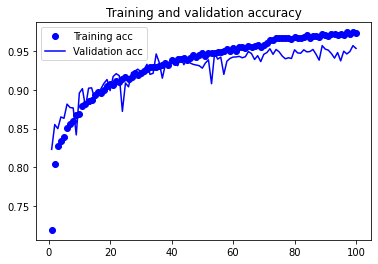

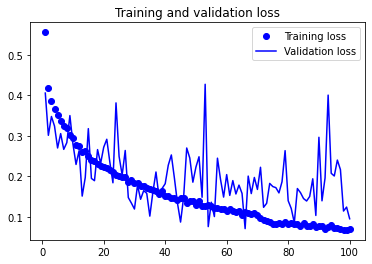

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/My Drive/dataset/cat & dog/cats_and_dogs_f2.h5')

In [ ]:
model_fin = load_model('/content/drive/My Drive/dataset/cat & dog/cat&dog_model.89-0.10.h5')

In [ ]:
test1_datagen = ImageDataGenerator(rescale=1./255)

test_dir = '/content/drive/My Drive/dataset/cat & dog/test'

test1_generator = test1_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

model_fin.evaluate_generator(test1_generator)

Found 2500 images belonging to 2 classes.


[0.007893595844507217, 0.951200008392334]

The final result of this model is similar to the previous model

Summary:

1. finally got a model with 95.3% accuracy on validation set and 95.1% accuracy on test set
2. The bias error is large, since the training accuracy is 97%, but the Bayes error should be close to 100%. The variance error is 2%, which is larger then the previous model.